#Датесет

In [1]:
from google.colab import files
uploaded = files.upload()

Saving aclImdb.zip to aclImdb.zip


In [0]:
!unzip aclImdb.zip

In [0]:
from sklearn import datasets

In [0]:
train = datasets.load_files('aclImdb/train/', categories = ['neg', 'pos'], random_state = 42)
test = datasets.load_files('aclImdb/test/', random_state = 42)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
tfidf_vect = TfidfVectorizer(max_features=1000, min_df=6, max_df=0.3, ngram_range=(1,2))
X_train_tfidf = tfidf_vect.fit_transform(train.data)
X_test = tfidf_vect.transform(test.data)

#Метрики

In [0]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot
from sklearn.metrics import *

In [0]:
def metrics(predicted, true):
  acc = accuracy_score(predicted, true)
  f1 = f1_score(predicted, true, average = 'binary')
  p = precision_score(predicted, true, average = 'binary')
  r = recall_score(predicted, true, average = 'binary')
  print('acc={0:1.4f}'.format(acc))
  print('F1={0:1.4f}, P={1:1.4f}, R={2:1.4f}'.format(f1, p, r))


In [0]:
def roc(true, predicted):
  y_true = true
  y_predicted = predicted
  fpr, tpr, _ = roc_curve(y_true, y_predicted)
  pyplot.plot(fpr, tpr, marker='.', label='Test')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

In [0]:
def my_metrics(predicted, true):
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for pr, tr in zip(predicted, true):
    if pr == tr == 1:
      tp += 1
    elif pr == tr == 0:
      tn += 1
    elif pr == 1 and tr == 0:
      fp += 1
    elif pr == 0 and tr == 1:
      fn += 1
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  F2 = 2 * precision * recall / (precision + recall)
  accuracy = (tp + tn) / (tp + fp + tn + fn)
  print('acc = {0:1.4f}'.format(accuracy))
  print('F1 = {0:1.4f}, P = {1:1.4f}, R = {2:1.4f}'.format(F2, precision, recall))

#1 модель - Мультиноминальный Байес


In [0]:
from sklearn.naive_bayes import MultinomialNB
clf_MNM = MultinomialNB().fit(X_train_tfidf, train.target)
predicted = clf_MNB.predict(X_test)

In [0]:
metrics(predicted, test.target)

acc=0.8262
F1=0.8272, P=0.8321, R=0.8223


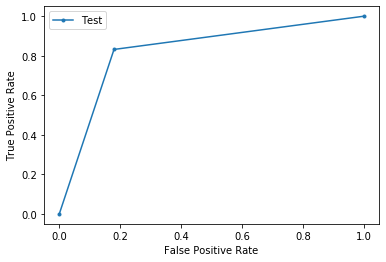

In [0]:
roc(test.target, predicted)

In [0]:
print(roc_auc_score(test.target, predicted))

0.82616


#Модель 2 - Логистическая регрессия 

In [0]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression().fit(X_train_tfidf, train.target)
predicted = clf_LR.predict(X_test)

In [51]:
metrics(predicted, test.target)

acc=0.8522
F1=0.8533, P=0.8596, R=0.8470


In [66]:
my_metrics(predicted, test.target) #здесь нужно перезапустить, потому что редактил функцию подсчёта уже после того как загрузил

acc = 0.8522
F1 = 0.8533, P = 0.8596, R = 0.8470


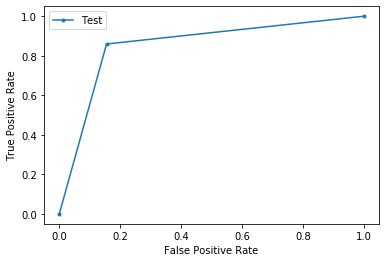

In [0]:
roc(test.target, predicted)

In [0]:
print(roc_auc_score(test.target, predicted))

0.85216


#Модель 3 - деревья решений

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf_DTC = DecisionTreeClassifier().fit(X_train_tfidf, train.target)
predicted = clf_DTC.predict(X_test)

In [0]:
metrics(predicted, test.target)

acc=0.6953
F1=0.6921, P=0.6850, R=0.6994


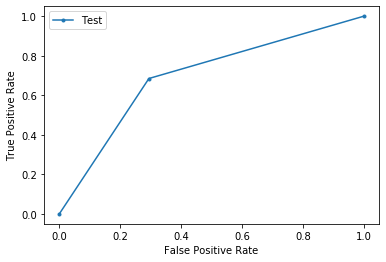

In [0]:
roc(test.target, predicted)

In [0]:
print(roc_auc_score(test.target, predicted))

0.6952799999999999


#Результаты

Логистическая регрессия даёт наилучший результат. На втором месте Мультиноминальный Байес (с очень небольшим отставанием). И замыкают деревья решений: результаты значительно хуже, а время обучения - выше. Даже по РОК-кривой деревьев решений можно видеть, насколько меньшую площадь охватывает данный метод. 

Мультиноминальный Байес:
acc=0.8262
F1=0.8272, P=0.8321, R=0.8223,
roc_auc:0.82616

Логистическая регрессия:
acc=0.8522
F1=0.8533, P=0.8596, R=0.8470,
roc_auc:0.85216

Деревья решений:
acc=0.6953
F1=0.6921, P=0.6850, R=0.6994,
roc_auc:0.6952799999999999


#Probs

In [0]:
probabilities = clf_LR.predict_proba(X_test)[:, 1]

In [69]:
#probabilities

array([0.12262239, 0.9736194 , 0.97205229, ..., 0.61913442, 0.83664074,
       0.96632189])

#Самые негативные рецензии.

In [0]:
neg_prob = probabilities.argsort()[:15]

In [0]:
#neg_prob

array([14717, 20032, 24458, 10751, 17852,  8479, 19152, 20861,  1400,
       15095, 12962, 10046, 11920, 20727, 17291])

In [0]:
negs = []
for sample in neg_prob:
  negs.append(test.data[sample])

for text in negs:
  print(text)

b'As you can tell from the other comments, this movie is just about the WORST film ever made. Let me see how many different words I can use to describe it: Boring, Unbearable, Laughable, Lousy, Stupid, Horrible.....<br /><br />I could go on with such descriptions but you probably get the point.<br /><br />I would have given this a 0, if possible--bad acting, bad directing, bad production, bad plot.<br /><br />This was made in 2001 and it looks more like 1965. Very low budget, boring plot, horrible acting, really bad special effects, etc...<br /><br />I rarely ever see a Sci-Fi film I absolutely think is this bad. I mean this is pure garbage. It has nothing going for it either. As far as a "B-movie" this is the very bottom of the lot.<br /><br />I think I would be more entertained by staring at a blank piece of paper for 90 minutes. Junk like this gives good low-budget "B" movies a bad name. This makes Ed Wood movies look good.<br /><br />The thing about watching direct-to-video movies 

#Самые позитивные рецензии.

In [0]:
pos_prob = probabilities.argsort()[-15:]

In [0]:
#pos_prob

array([15124, 21064, 17883, 24742,  7294, 21732,  2771, 12974, 16029,
       10121,  6185, 22216, 14226,  9736, 24154])

In [0]:
pos = []
for sample in pos_prob:
  pos.append(test.data[sample])

for text in pos:
  print(text)

b'This is absolutely one of our favourites of 2007.<br /><br />The tale of two boys who come from different worlds but are as close as brothers is brilliantly told.<br /><br />Beautifully shot, and scripted - from childhood to the adulthood it never falters.<br /><br />A brilliant insight into a lost culture, and a very good way to understand Farsi cultures and traditions this is also an exceptional tale in its own right. It is both compassionate and thrilling, uplifting and filled with immense sorrow, joyful and depressing.<br /><br />With excellent performances from the cast and great technical skills behind the camera this really is film at its best.<br /><br />Highest recommendation: a real slice of life that uplifts and informs.'
b'This wonderful movie captures so many elements of what makes a family comedy funny, entertaining, sweet and memorable, it\'s difficult to decide where to start.<br /><br />From the opening number, "Rainbow Connection," Paul Williams\'s excellent score s